In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
from os import walk, makedirs

/home/blake/.local/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


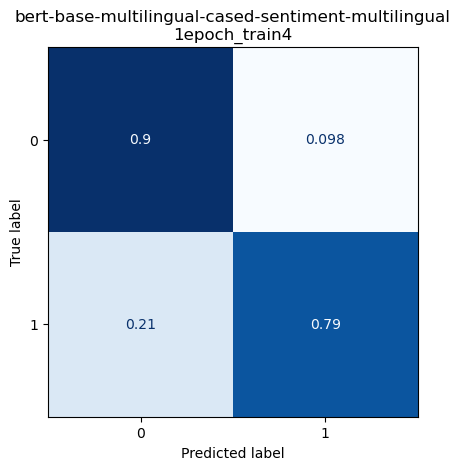

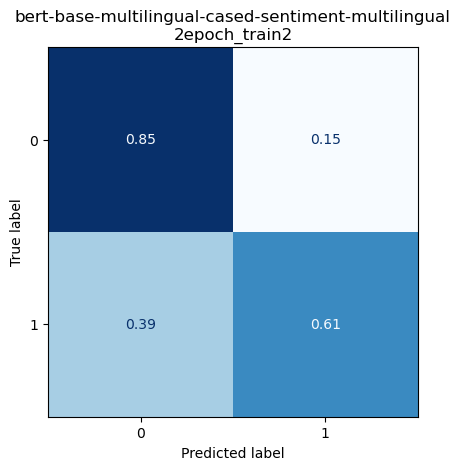

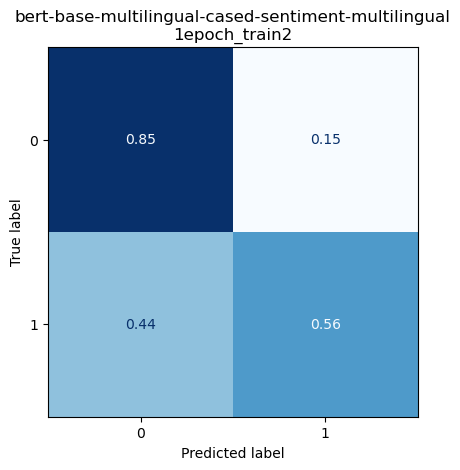

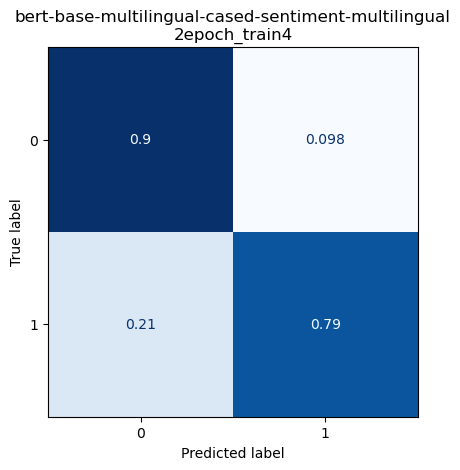

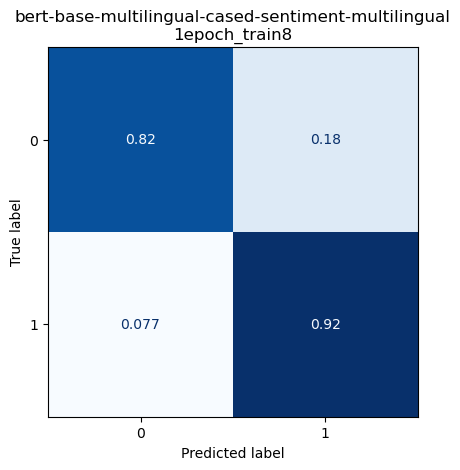

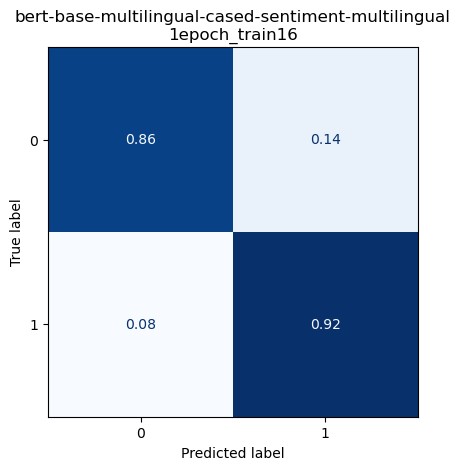

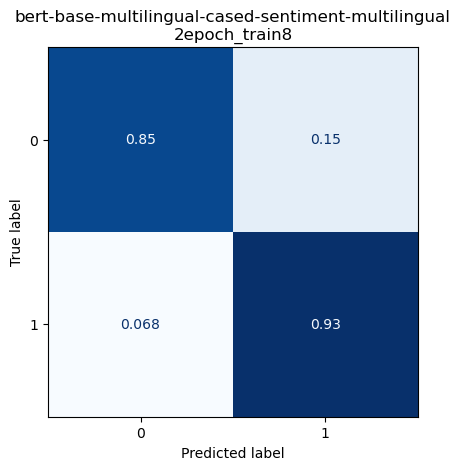

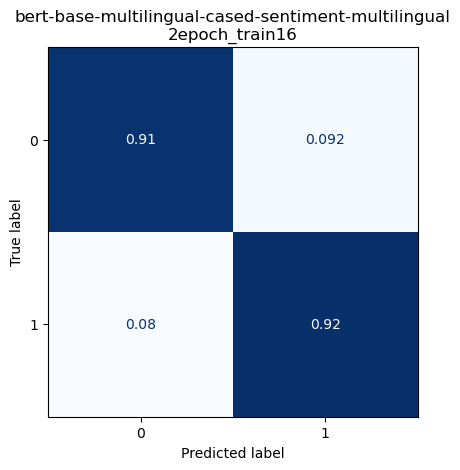

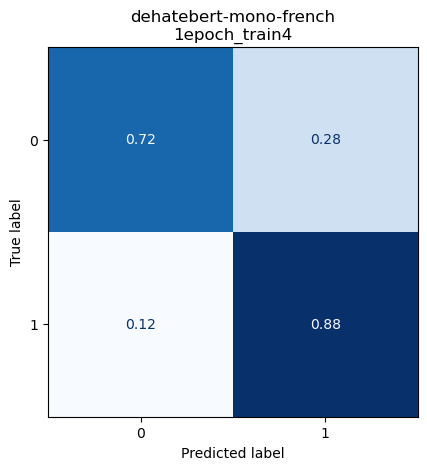

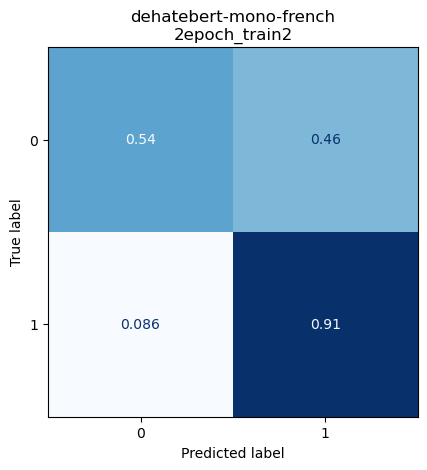

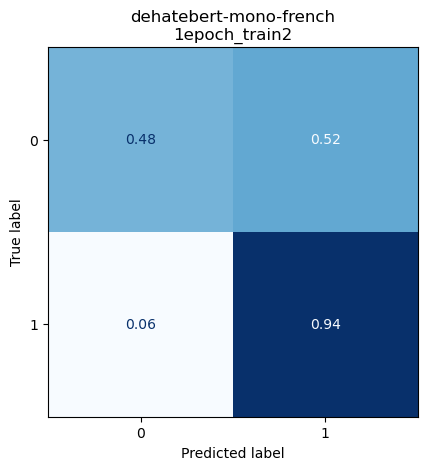

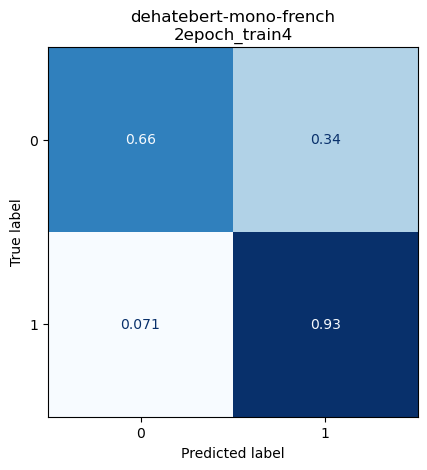

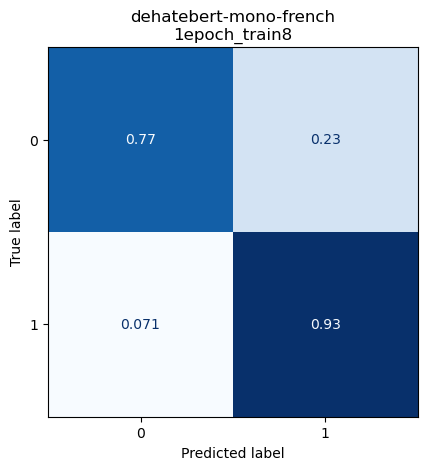

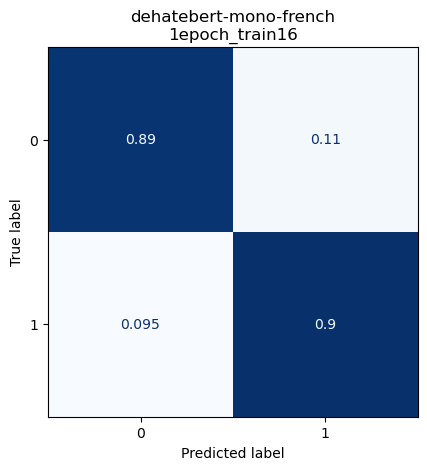

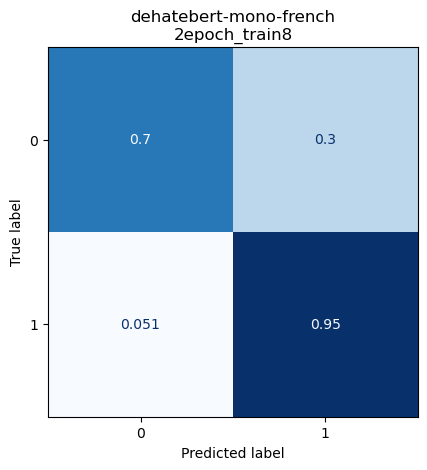

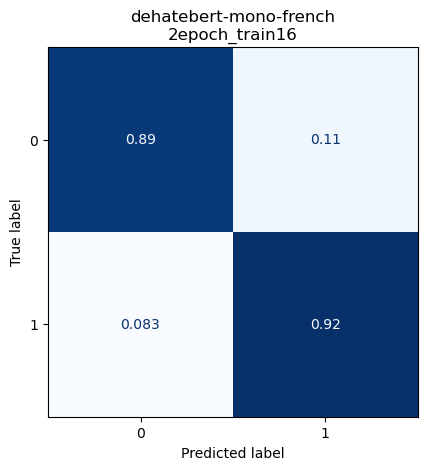

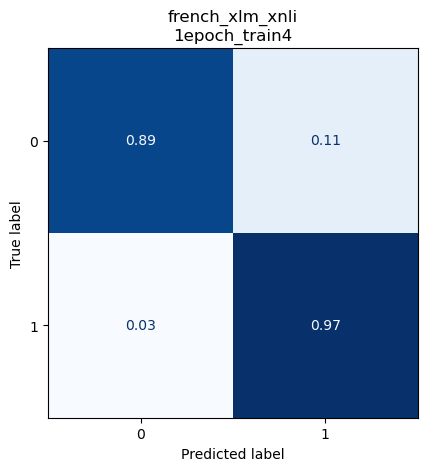

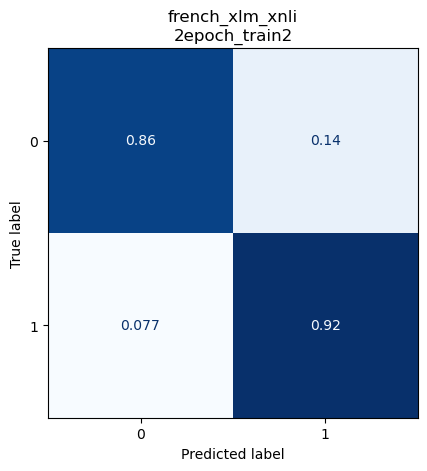

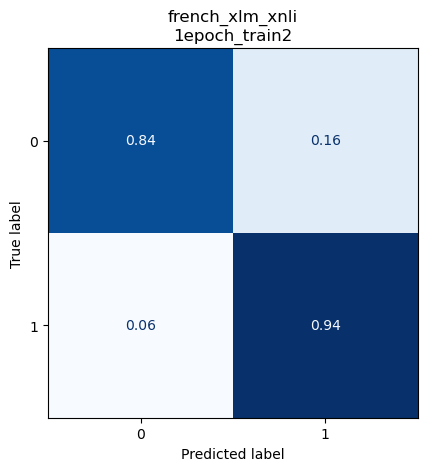

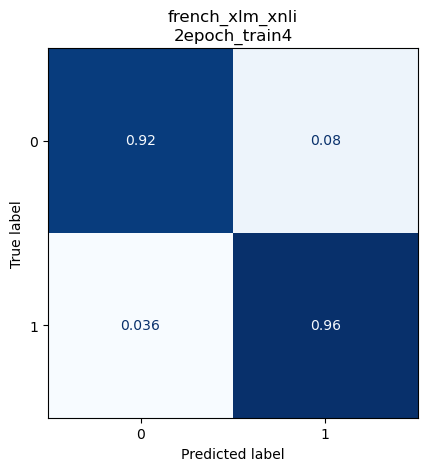

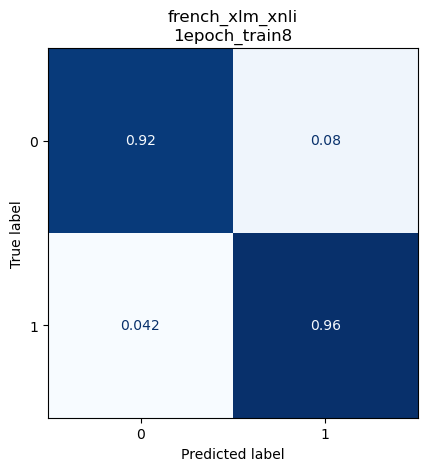

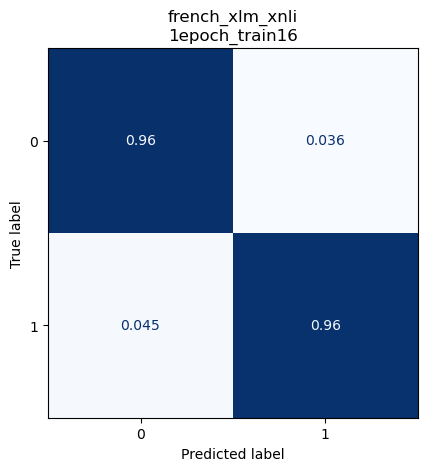

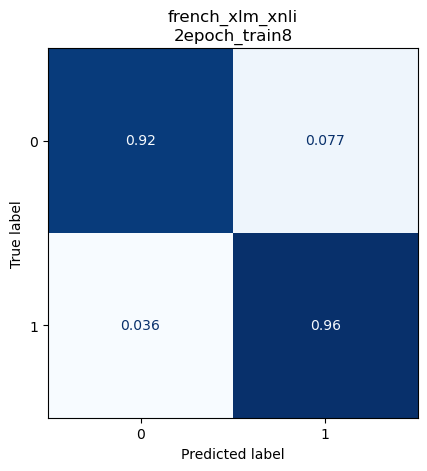

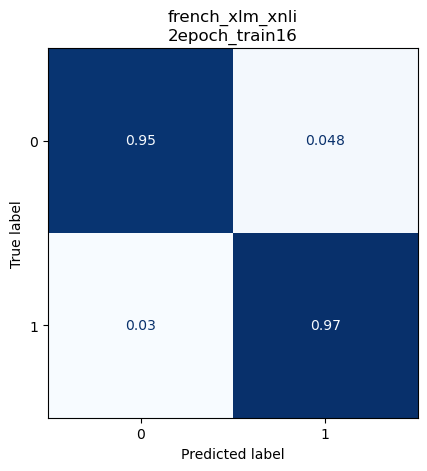

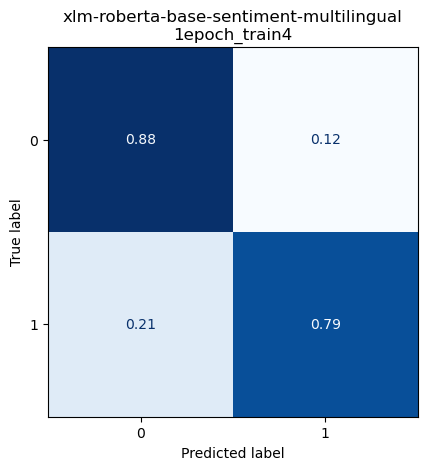

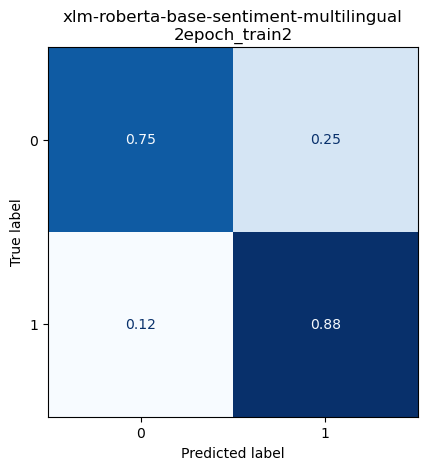

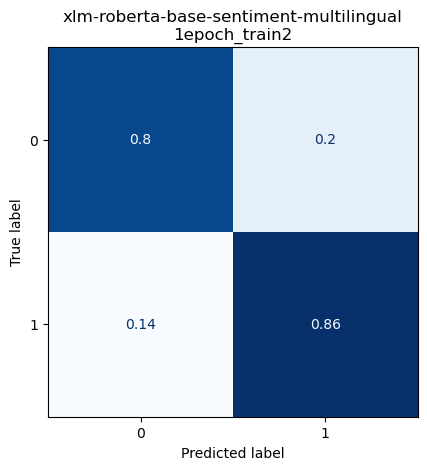

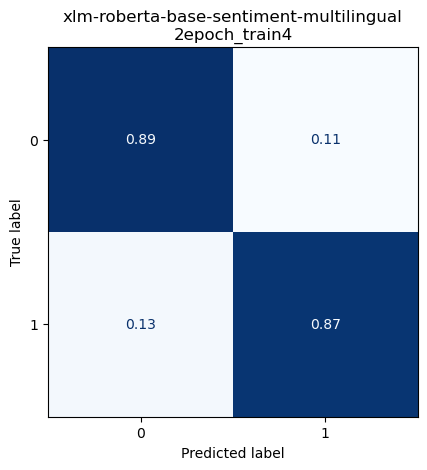

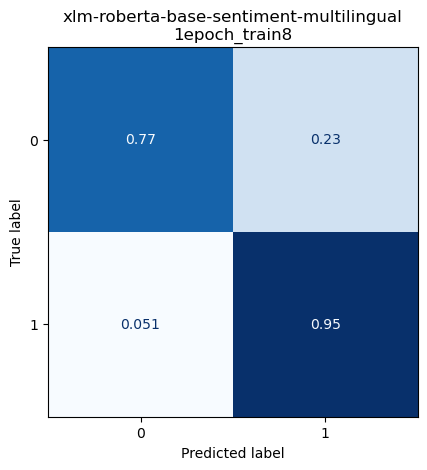

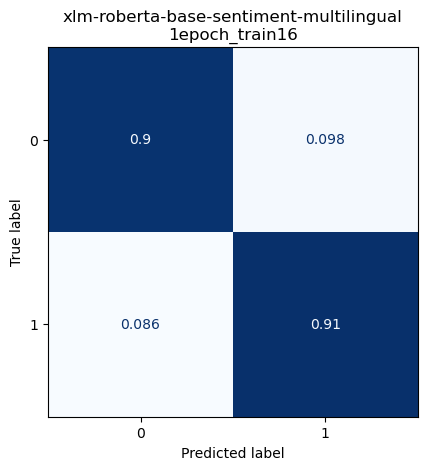

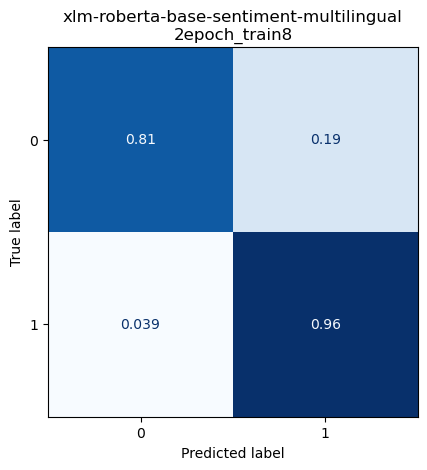

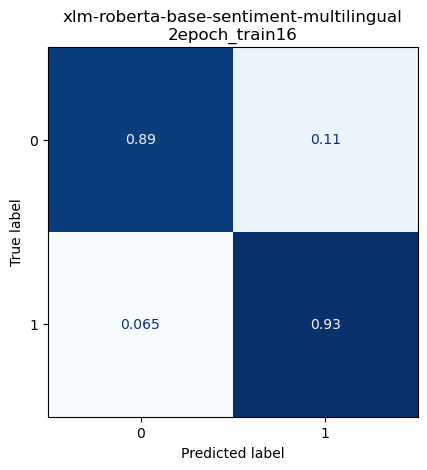

In [23]:
predictions_dir = '../predictions/'
# k_folds_dirs = next(walk(predictions_dir))[1]
pretrained_dirnames =['bert-base-multilingual-cased-sentiment-multilingual',
                      'dehatebert-mono-french',
                      'french_xlm_xnli',
                      'xlm-roberta-base-sentiment-multilingual']

for pretrained in pretrained_dirnames:
  makedirs(f"../confusion_matricies/{pretrained}/")
  result_files = next(walk(f"{predictions_dir}/k_is_0/{pretrained}/"))[2]
  for file in result_files:
    class_ = list()
    prediction = list()
    # combine all classes and predictions together.
    for k in range(0,3):
      results = pd.read_csv(f"{predictions_dir}/k_is_{k}/{pretrained}/{file}").sample(frac=1)
      class_.extend(results["class"].tolist())
      prediction.extend(results["predicted"].tolist())
    
    confusion_matrix = ConfusionMatrixDisplay.from_predictions(class_, prediction, cmap=plt.cm.Blues, normalize='true', colorbar=False)
    confusion_matrix.ax_.set_title(f"{pretrained}\n{file}")
    confusion_matrix.ax_.figure.savefig(f"../confusion_matricies/{pretrained}/{file}")
